                               ##    CREDIT CARD FRAUD DETECTION PROJECT     ##

 GOAL OF THE PROJECT:
 The goal of the project is to use machine learning in credit card fraud detection. The model is developed and trained by given creditcard dataset. Which allows to  acquire more knowledge and how to use machine learning in day to day senario.

IMPORTANCE OF SENSITIVITY AND PRECISION IN PROJECT:
Sensitivity:
Measures the proportion of actual fradulent transaction.
Precision:
Measures the proportion of transaction identified as fraud that are actually fradulent.

In [31]:
# import library
import sklearn
from sklearn import metrics

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score,f1_score

In [35]:
# import dataset
df = pd.read_csv("creditcard.csv")

In [36]:
#inforamtion about no of rows and columns
print(df.shape)

(284807, 31)


In [37]:
# Column name with first 5 rows
print(df.head(5))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [40]:
#description of data in dataframe
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [43]:
#summary of dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The below cell shows the class distribution of fraud vs non fraud transaction of given dataset

Class as pie chart:


Text(0, 0.5, '')

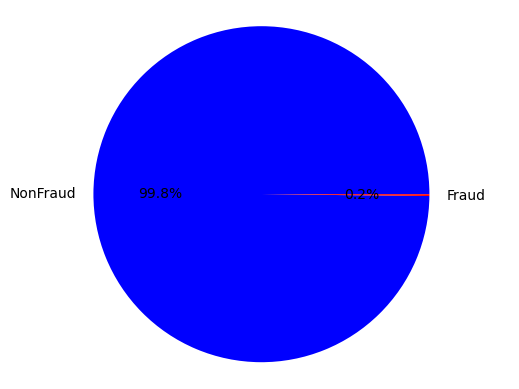

In [46]:
# class distribution
print("Class as pie chart:")
fig, ax = plt.subplots(1,1)
ax.pie(df.Class.value_counts(), autopct= '%1.1f%%' , labels=['NonFraud' , 'Fraud'] , colors=['blue' ,'r'])
plt.axis('equal')
plt.ylabel('')

 'Time' Feature :
 Yes, Time feature is used to predict fraud by observing the distinct pattern between Non_fraud and Fraud. This Features describes the time of transaction occured. 

Time Variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, 'transaction')

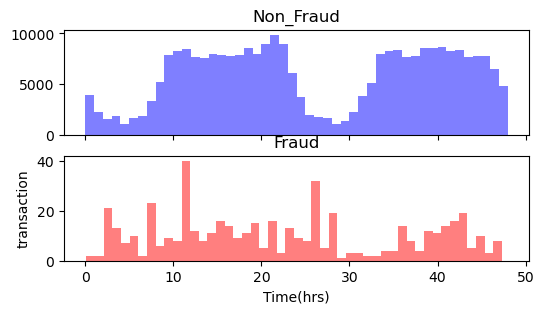

In [49]:
# time plotting
print("Time Variable")
df["Time_Hr"] = df["Time"]/3600
print(df["Time_Hr"].tail(5))
fig , (ax1, ax2) = plt.subplots(2,1, sharex =True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0], bins=48, color='b', alpha=0.5)
ax1.set_title('Non_Fraud')
ax2.hist(df.Time_Hr[df.Class==1], bins=48, color='r', alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time(hrs)')
plt.ylabel('transaction')


'Amount" Feature:
The Amount feature should be standardized for the model performance. It transforms into standard format which is easy to understand and use.

Dropped features:
'Time' feature is dropped or removed to improve model performance.

In [53]:
df = df.drop(["Time"] ,axis = 1, inplace = True)

Text(0, 0.5, 'transaction')

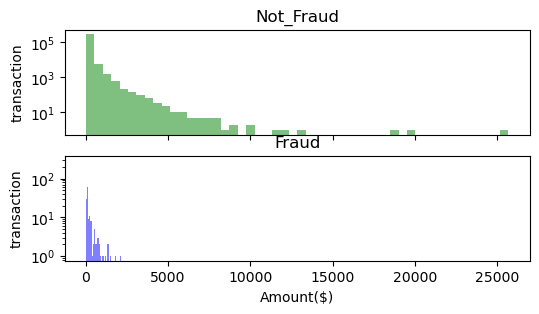

In [65]:
# 'Amount' feature
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0], bins=50,color='g', alpha=0.5)
ax3.set_yscale('log')
ax3.set_title('Not_Fraud')
ax3.set_ylabel('transaction')
ax4.hist(df.Amount[df.Class==1], bins=50,color='b', alpha=0.5)
ax4.set_yscale('log')
ax4.set_title('Fraud')
ax4.set_xlabel('Amount($)')              
ax4.set_ylabel('transaction')                 

In [29]:
# preprocessing
from sklearn.preprocessing import StandardScaler
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'], axis = 1)

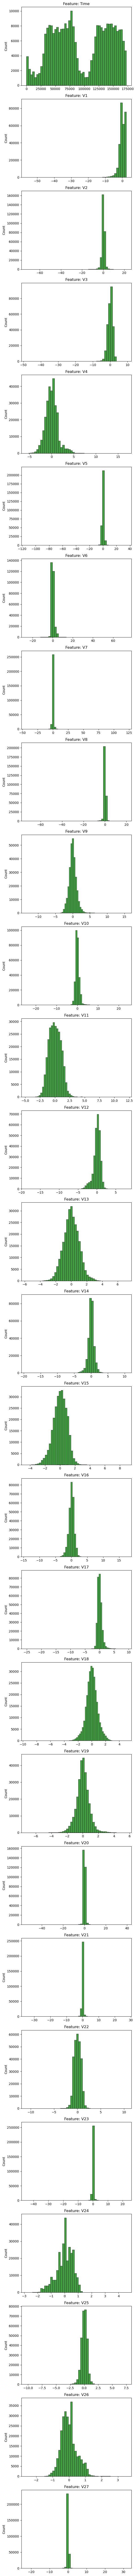

In [37]:

# Calculate columns
n_cols = len(df.iloc[:, 0:28].columns)

#  multiple subplots
fig, axs = plt.subplots(nrows=n_cols, ncols=1, figsize=(6, n_cols*4))

# Loop  each column
for i, col in enumerate(df.iloc[:, 0:28].columns):
    # Create a histplot for each class
    sns.histplot(df[col][df.Class == 1], bins=50, color='r', ax=axs[i])
    sns.histplot(df[col][df.Class == 0], bins=50, color='g', ax=axs[i])
    
    # Set the title and remove the x-axis label
    axs[i].set_title('Feature: ' + str(col))
    axs[i].set_xlabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
# train test dat split
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [43]:
# classifier defining
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob


In [45]:
# print classifier score
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Gaussian Naive Bayes :
The Gaussian Naive Bayes handle continuous feature by assuming the data as normally distributed with in class. It is estimated by mean and standard deviation

Steps in training the naive Bayes model:
1.Data preparation
2.Feature Selection
3.Model initialization
4.Estimating parameter
5.Split data into Training & Test
6. Evaluate model


In [47]:
# import Gaussian Naives Bayes , Logistic Regression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [49]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[225948   1503]
 [   140    254]]
test-set confusion matrix:
 [[56457   407]
 [   33    65]]
recall score:  0.6632653061224489
precision score:  0.13771186440677965
f1 score:  0.22807017543859648
accuracy score:  0.9922755521224677
ROC AUC: 0.967730650574805


In [55]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[226210   1241]
 [   135    259]]
test-set confusion matrix:
 [[56521   343]
 [   31    67]]
recall score:  0.6836734693877551
precision score:  0.16341463414634147
f1 score:  0.2637795275590551
accuracy score:  0.9934342193040975
ROC AUC: 0.9683570107840547


In [63]:
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
drop_list = [col for col in drop_list if col in df.columns]
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[226210   1241]
 [   135    259]]
test-set confusion matrix:
 [[56521   343]
 [   31    67]]
recall score:  0.6836734693877551
precision score:  0.16341463414634147
f1 score:  0.2637795275590551
accuracy score:  0.9934342193040975
ROC AUC: 0.9683570107840547


In [67]:
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
drop_list = [col for col in drop_list if col in df.columns]
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[226210   1241]
 [   135    259]]
test-set confusion matrix:
 [[56521   343]
 [   31    67]]
recall score:  0.6836734693877551
precision score:  0.16341463414634147
f1 score:  0.2637795275590551
accuracy score:  0.9934342193040975
ROC AUC: 0.9683570107840547


In [69]:
df = df.drop(drop_list,axis=1)
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')


In [73]:
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[227423     28]
 [   169    225]]
test-set confusion matrix:
 [[56851    13]
 [   41    57]]
recall score:  0.5816326530612245
precision score:  0.8142857142857143
f1 score:  0.6785714285714286
accuracy score:  0.9990519995786665
ROC AUC: 0.9636151203587794


In [67]:
fraud_ind = np.array(df[df.Class == 1].index)
notfraud_ind = df[df.Class == 0].index
n_fraud = len(df[df.Class == 1])
# random selection from notfraud class
random_notfraud_ind = np.random.choice(notfraud_ind, n_fraud, replace = False)
random_notfraud_ind = np.array(random_notfraud_ind)
# merge two class indices: random genuine + original fraud
under_sample_ind = np.concatenate([fraud_ind,random_notfraud_ind])
# Under sample dataset
undersample_df = df.iloc[under_sample_ind,:]
y_undersample  = undersample_df['Class'].values #target
X_undersample = undersample_df.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_df))
print("% notfraud transactions: ",len(undersample_df[undersample_df.Class == 0])/len(undersample_df))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_df))

# transactions in undersampled data:  984
% notfraud transactions:  0.5
% fraud transactions:  0.5


In [81]:
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_df, drop_list)
y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear'), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  787 
test-set size:  197
fraud cases in test-set:  98
train-set confusion matrix:
 [[379  14]
 [ 50 344]]
test-set confusion matrix:
 [[95  4]
 [ 6 92]]
recall score:  0.9387755102040817
precision score:  0.9583333333333334
f1 score:  0.9484536082474226
accuracy score:  0.949238578680203
ROC AUC: 0.9864976293547723


In [83]:
lr = LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear')
# fit it to complete undersampled data
lr.fit(X_undersample, y_undersample)
# predict on full data
y_full = df['Class'].values #target
X_full = df.drop(['Class'],axis=1).values #features
y_full_pred = lr.predict(X_full)
# Compute predicted probabilities: y_pred_prob
y_full_pred_prob = lr.predict_proba(X_full)
print("scores for Full set")   
print('test-set confusion matrix:\n', confusion_matrix(y_full,y_full_pred)) 
print("recall score: ", recall_score(y_full,y_full_pred))
print("precision score: ", precision_score(y_full,y_full_pred))

scores for Full set
test-set confusion matrix:
 [[276455   7860]
 [    56    436]]
recall score:  0.8861788617886179
precision score:  0.05255544840887175


In [85]:
y_p20_pred = lr.predict(X_test)
y_p20_pred_prob = lr.predict_proba(X_test)
print("scores for test set")   
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_p20_pred)) 
print("recall score: ", recall_score(y_test,y_p20_pred))
print("precision score: ", precision_score(y_test,y_p20_pred))

scores for test (20% of full) set
test-set confusion matrix:
 [[55277  1587]
 [   10    88]]
recall score:  0.8979591836734694
precision score:  0.05253731343283582


How sensitivity and precision are calculated?
Sensitivity: recall_score function is used to measure the proportion of actual fradulent transaction.
             formula: sensitivity = TP / (TP+FN)
Precision : precision_score function is used to measure the proportion of transaction ,which is identified as fraud that are actually               fraudulent.
             Formula: precision = TP / (TP+FP) 

Metrices used to evaluate model's performance:
confusion_matrix : Gives a summary of true positive , false positive, true negative and false negative
auc : Area Under Curve evaluates model's performance across possible event
roc_auc_score : Area Under the Receiver Operating Characteristic, vurve plots true positive rate aganist false positive rate at different threshold
Accuracy_score : overall correctness
recall_score: Proportion of true positives among all actual fraudulent transactions
precision_score: proportion of true positives among all positive prediction
f1_score: Harmonic mean of precision and recall


Key finding of model prediction:
precision_score = 5.2
recall_score = 89
confusion matrix = 57062

Limitation of Naive bayes:
1.Independent assumption
2.sensitivity to imabalanced data
3.limited ability in case of complex relationship
4.Lack of adaptability


Other algorithm to improve performance:
Random forest
Support Vector Machine
Decision tree
K-NN

Steps to implement Navie Bayes in Python:
1. import library
2. import dataset
3. train test split
4. feature scaling
5. training navie bayes model

Cross validation:
It helps this model to handle imbalance data evaluating models performance on multiple dataset.
Identifies feature which is more important to detect fraudulent
Improves accuracy and robustness.